In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [23]:
from google.colab import drive
drive.mount("/gdrive")
base_path = "/gdrive/My Drive/Colab Notebooks/indian-diabetes/"

Mounted at /gdrive


In [24]:
data = pd.read_csv(base_path + "diabetes.csv")

In [29]:
X = data.iloc[:, 0:8]
y = data.iloc[:,8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7597402597402597

In [30]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [40]:
!pip install pdpbox

     |████████████████████████████████| 34.0 MB 176 kB/s 
     |████████████████████████████████| 13.1 MB 6.9 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=34a7ed51342d0bd17aa5bc8e6d4040f716768045188a2d8056b15a4c0fa0b9f6
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


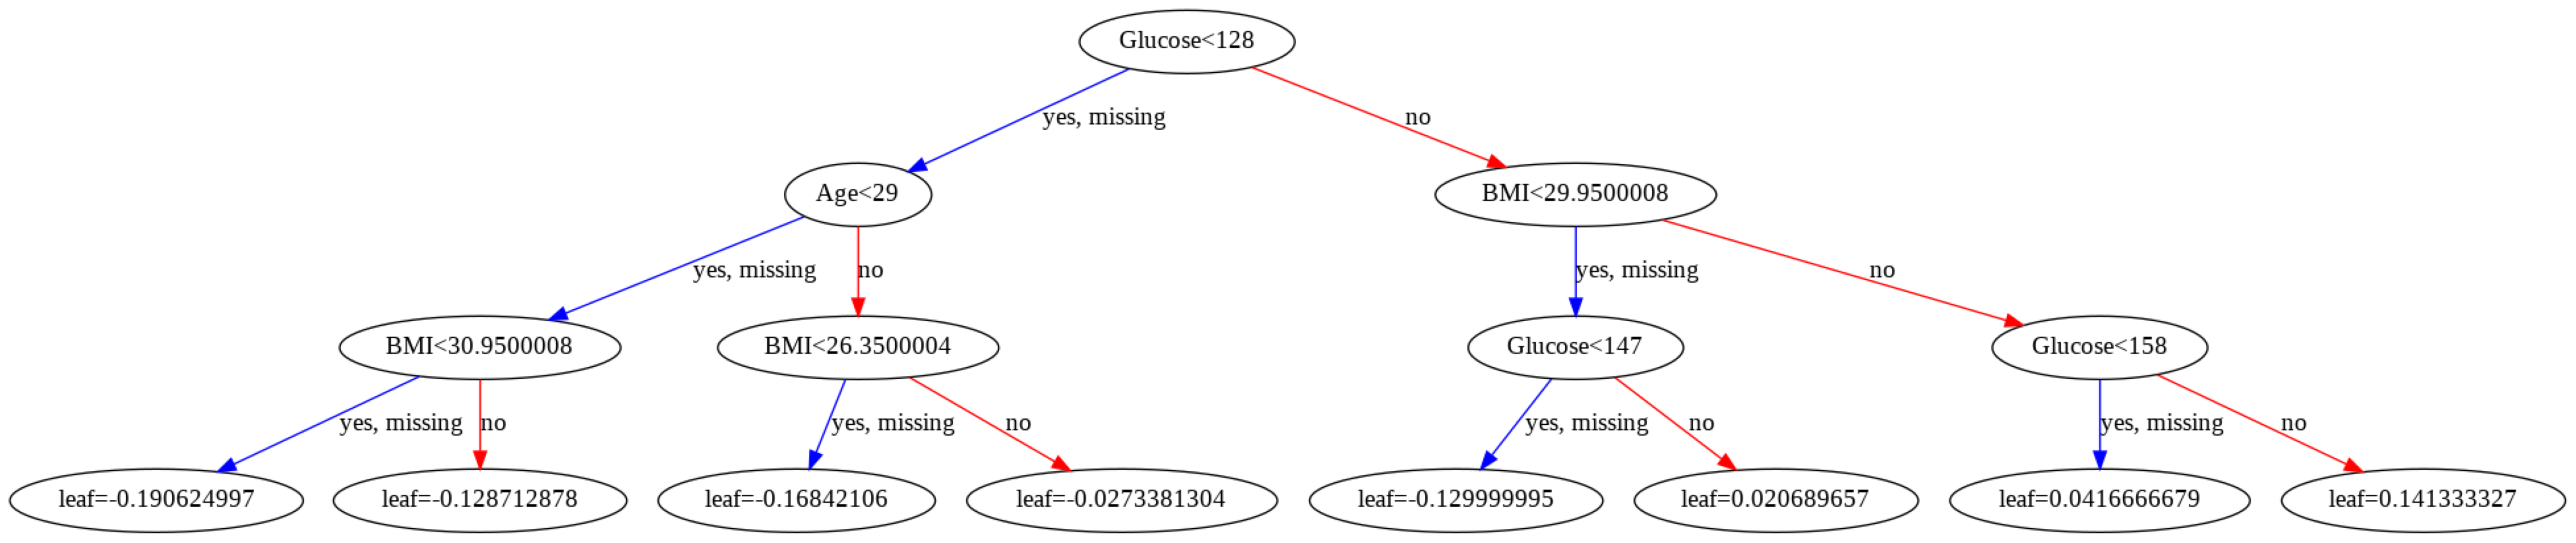

In [36]:
#plot of model
%matplotlib inline
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 100, 200

plot_tree(model)
plt.show()

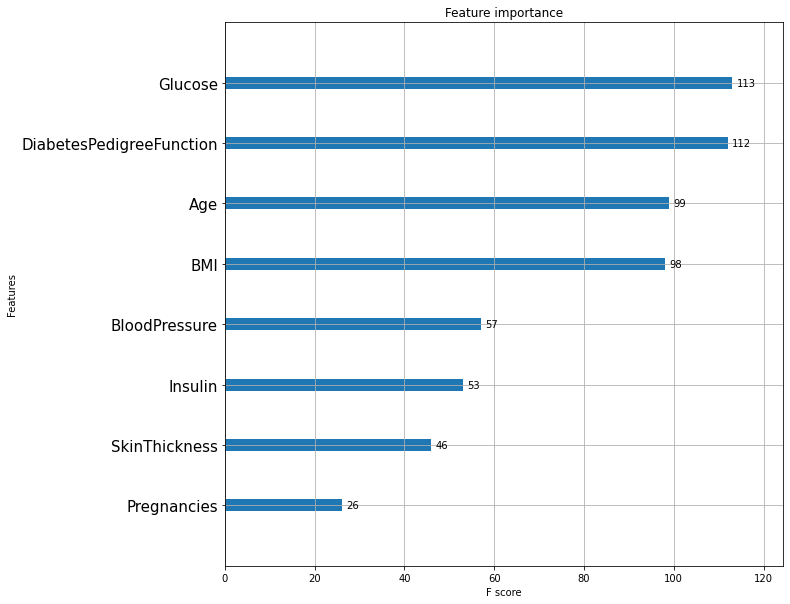

In [38]:
#feature importance
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


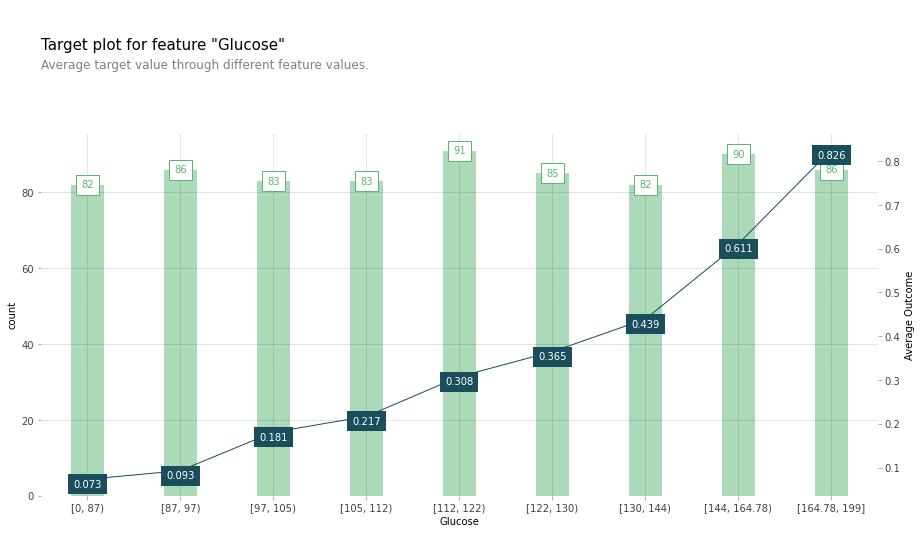

In [43]:
from pdpbox import info_plots

pima_features = data.columns[:8]
pima_target = data.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=data,
    feature='Glucose',
    feature_name='Glucose',
    target=pima_target
)

/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction[:, 1]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


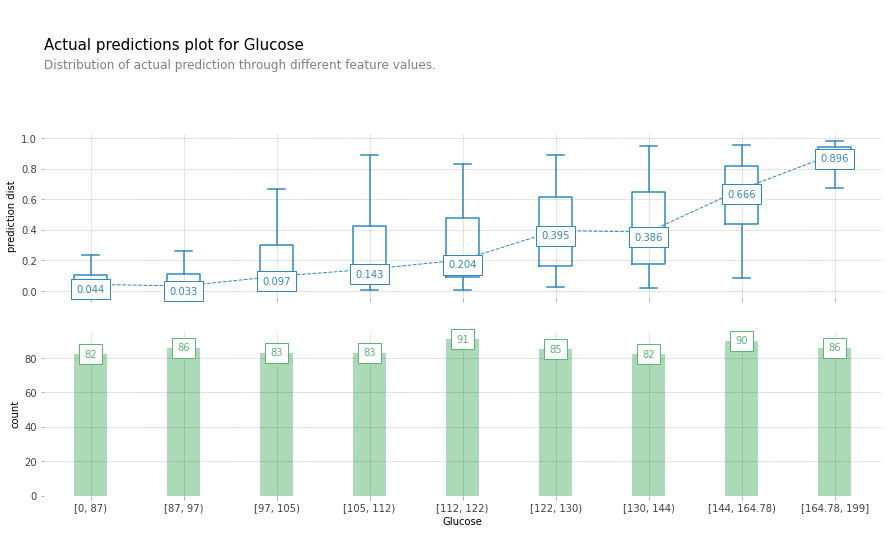

In [46]:
#real model's pdp plot

fig, axes, summary_df = info_plots.actual_plot(
    model=model,
    X=data[pima_features],
    feature='Glucose',
    feature_name='Glucose',
    predict_kwds={}
)